In [30]:
import fnmatch
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [31]:
os.system('go run main.go')

2022/11/10 02:40:46 h = 0.000830
2022/11/10 02:40:48 M_1_1 = 16 eps_1_1 = 5.43202 dif_1_1 = 0.99704 
2022/11/10 02:40:48 ZV_1_1 took 2.172954583s
2022/11/10 02:40:50 M_1_2 = 10 eps_1_2 = 5.43455 dif_1_2 = 1.01302 
2022/11/10 02:40:50 ZV_1_2 took 1.250389417s
2022/11/10 02:41:00 M_2_1 = 63 eps_2_1 = 5.40000 dif_2_1 = 1.07585 
2022/11/10 02:41:00 ZV_2_1 took 10.175013875s
2022/11/10 02:41:01 M_2_2 = 10 eps_2_2 = 5.50000 dif_2_2 = 1.07846 
2022/11/10 02:41:01 ZV_2_2 took 1.231359917s


0

In [32]:
def graph(name: str) -> None:
  f_case = open(name)
  data_case = json.load(f_case)
  x_axis = np.array(data_case['XAXIS'])
  fy_axis = np.array(data_case['YAXIS'])
  N = data_case['N']
  M = data_case['M']
  r = data_case['R']
  phi = data_case['PHI']
  eps = data_case['EPS']
  delta = data_case['DELTA']
  plt.figure(figsize=(10, 8))
  plt.rcParams["font.family"] = "serif"
  plt.rcParams["font.serif"] = ["Times New Roman"]
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(x_axis, fy_axis, color='g', label='f(x)', lw=2, fillstyle='none')#f(x)
  font = {
    'size': 20
  }
  plt.figtext(
    0,
    1,
    f"N: {N}\n"
    f"eps: {eps}\n"
    f"diff: {data_case['DIFF']}\n"
    f"M: {M}\n"
    f"delta: {delta}\n"
    f"{name}",
    fontdict=font
  )
  cx_axis = [[]*(N+1) for i in range(N+1)] #точки
  cy_axis = [[]*(N+1) for i in range(N+1)]

  for j in range (N+1):
    cy_axis[j] = np.arange(r[j],r[j]+delta, delta+1)
    for x in cy_axis[j]:
      cx_axis[j].append(phi[j])
  for j in range(N):
    plt.plot(cx_axis[j], cy_axis[j], color='r', lw=5, fillstyle='full', marker='o')
  plt.legend()
  plt.show()

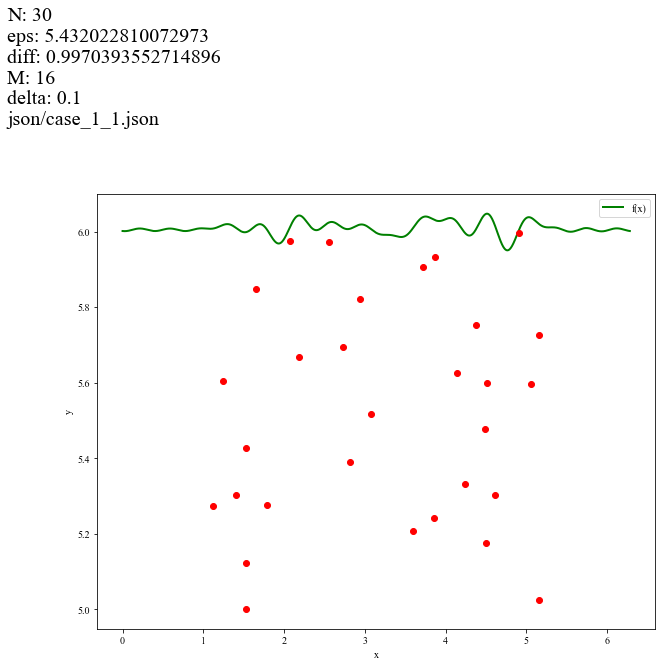

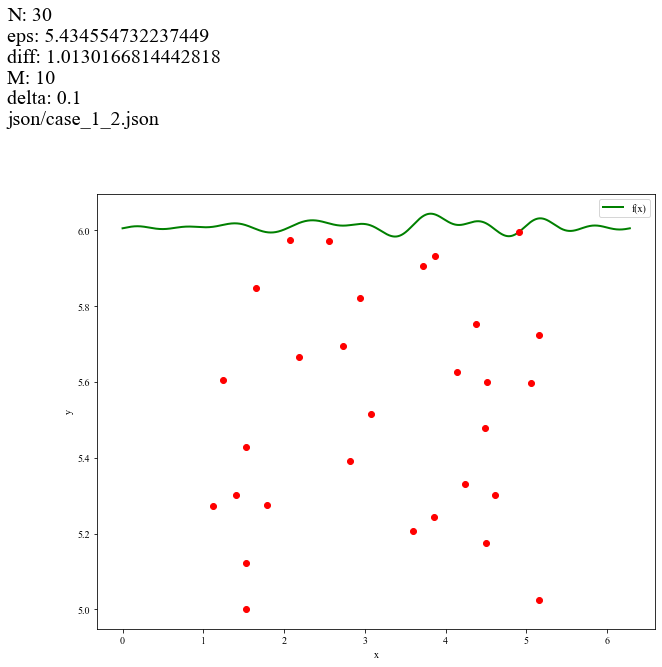

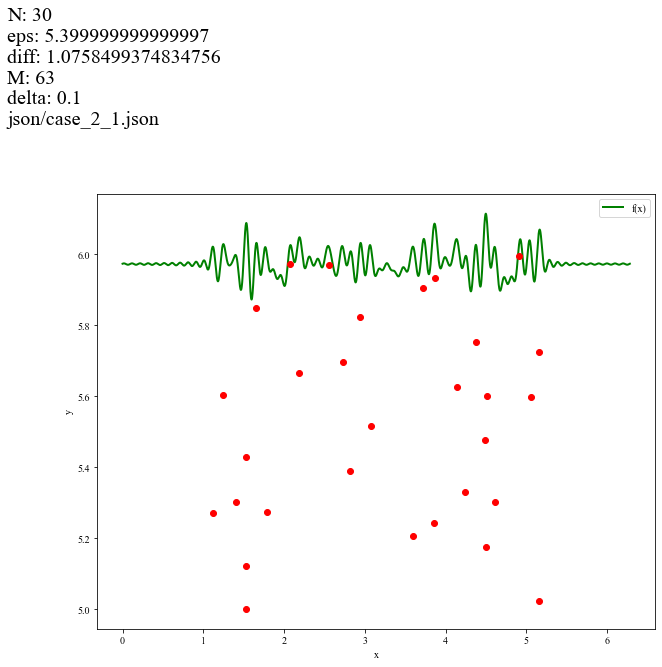

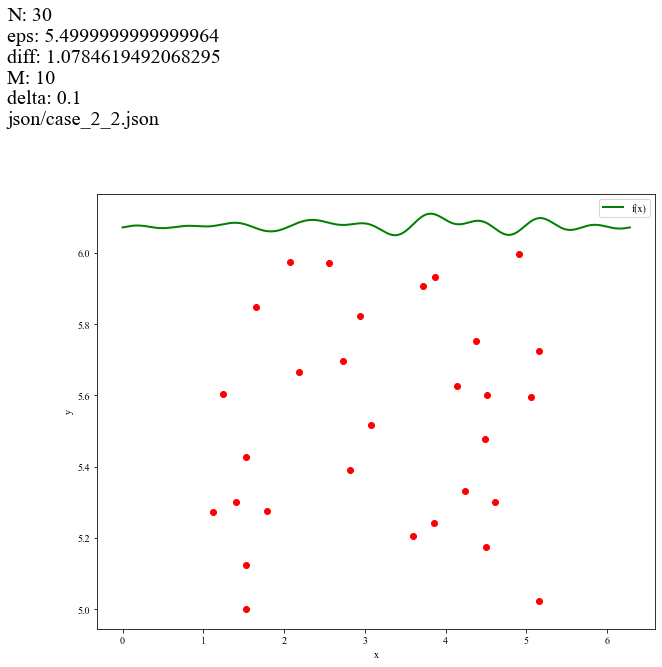

In [33]:
jsons = [f for f in os.listdir("json/") if fnmatch.fnmatch(f, '*.json')]
jsons.sort()
for i in range(len(jsons)):
  graph(f"json/{jsons[i]}")